In [2]:
# prompt: peakutils install

!pip install peakutils


In [3]:
# prompt: pip install for import pymrmr

!pip install pymrmr


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pymrmr: filename=pymrmr-0.1.11-cp311-cp311-linux_x86_64.whl size=400970 sha256=87f32208e8ed249d43040d282ea6a4961785822814432eb26f36e513b36f5194
  Stored in directory: /root/.cache/pip/wheels/a0/d7/97/71bca023a0dbdceab24a556649d661e71114f4eaaf4dda56d6
Successfully built pymrmr


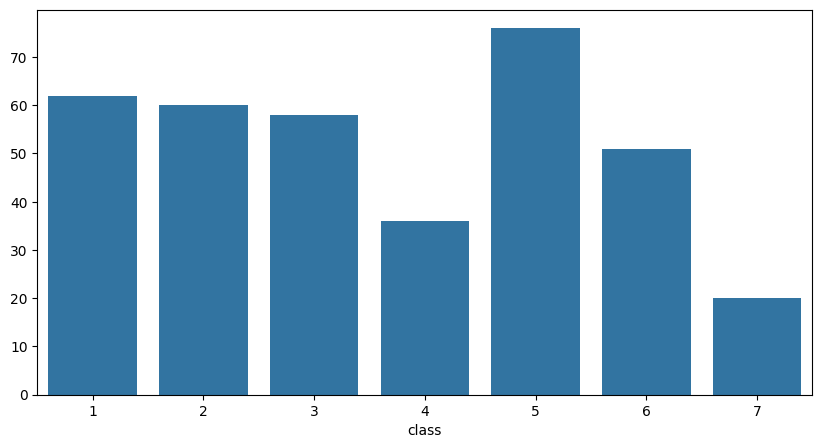

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from peakutils import baseline
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

df = pd.read_csv('data.csv')
df = df[df['class'] != 8]
train_data, test_data = train_test_split(df, test_size=0.2, shuffle = True, random_state=42)

plt.figure(figsize=(10, 5))
sns.barplot(x=df['class'].value_counts().index, y=df['class'].value_counts().values)
plt.show()

In [5]:
# pd.set_option('future.no_silent_downcasting', True)
map = {
    'transparency': {'o': 1, 't': 2, 's': 3},
    'color': {'white': 1, 'none': 2, 'blue': 3,
              'black': 4, 'green':5, 'red': 6,
              'orange': 7, 'gray': 8, 'yellow': 9,
              'purple': 10},
    'device_id': {'B0236F1F2D02C632': 1, 'D02B30ACFD92433E': 2,
                  'B02EFC17B97B46B2': 3, '802215F15396F9FE': 4},
}
train_data = train_data.replace(map)
train_data

<ipython-input-5-99ee93e53a27>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data = train_data.replace(map)


,class,id,color,transparency,device_id,spectrum_0 + 740,spectrum_1 + 740,spectrum_2 + 740,spectrum_3 + 740,spectrum_4 + 740,...,sample_raw_321 + 740,sample_raw_322 + 740,sample_raw_323 + 740,sample_raw_324 + 740,sample_raw_325 + 740,sample_raw_326 + 740,sample_raw_327 + 740,sample_raw_328 + 740,sample_raw_329 + 740,sample_raw_330 + 740
209,4,30,5,1,4,0.166425,0.171267,0.176470,0.181951,0.187715,...,2.52,2.42,2.32,2.20,2.06,1.92,1.76,1.59,1.40,1.20
338,6,64,2,2,3,1.224040,1.222989,1.221854,1.220812,1.219938,...,8.78,8.42,8.02,7.56,7.07,6.52,5.94,5.31,4.65,3.94
357,7,18,1,3,4,0.256470,0.256815,0.257105,0.257289,0.257364,...,1.85,1.78,1.70,1.62,1.52,1.41,1.30,1.17,1.03,0.88
75,2,19,4,1,4,0.125029,0.125157,0.125292,0.125405,0.125485,...,0.92,0.89,0.85,0.80,0.76,0.70,0.65,0.58,0.51,0.44
84,2,28,1,3,4,0.244256,0.244085,0.243875,0.243581,0.243196,...,1.11,1.07,1.03,0.97,0.91,0.85,0.78,0.71,0.62,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2,11,3,1,4,0.061729,0.062024,0.062407,0.062877,0.063446,...,1.69,1.63,1.55,1.47,1.39,1.29,1.18,1.07,0.94,0.81
106,2,50,4,1,2,1.035098,1.034636,1.034294,1.034104,1.034010,...,6.68,6.42,6.12,5.79,5.43,5.02,4.58,4.11,3.61,3.06
270,5,74,1,1,1,0.577730,0.578829,0.579991,0.581201,0.582474,...,3.75,3.60,3.44,3.25,3.04,2.82,2.57,2.31,2.03,1.72
348,7,6,1,1,4,0.848607,0.828112,0.808462,0.789968,0.772597,...,6.57,6.32,6.04,5.73,5.39,5.01,4.60,4.15,3.67,3.14


## Balancing the minority classes (Oversampling)

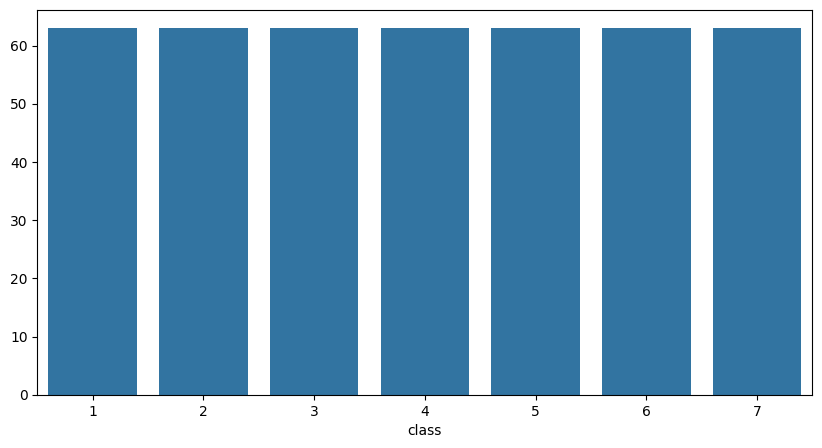

In [6]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE(random_state=42)
x_train, y_train = oversampler.fit_resample(train_data.iloc[:, 1:], train_data['class'])
train_data = pd.concat([y_train, x_train], axis=1)
train_data = pd.DataFrame(train_data, columns=train_data.columns)

plt.figure(figsize=(10, 5))
sns.barplot(x=train_data['class'].value_counts().index, y=train_data['class'].value_counts().values)
plt.show()

In [7]:
def plot_signal(train_data, df_class=None, labels=None):
    for i, row in train_data.iterrows():
        if labels == 'yes':
            plt.plot(range(len(row)), row.values,label=f"Plasic Type: {df_class[i]}")
            plt.legend(fontsize=8)
        else:
            plt.plot(range(len(row)), row.values)
    plt.xlabel('Wavelength')
    plt.ylabel('Intensity')
    plt.title('Spectral Data for All Samples')
    plt.show()

## Data after Oversampling

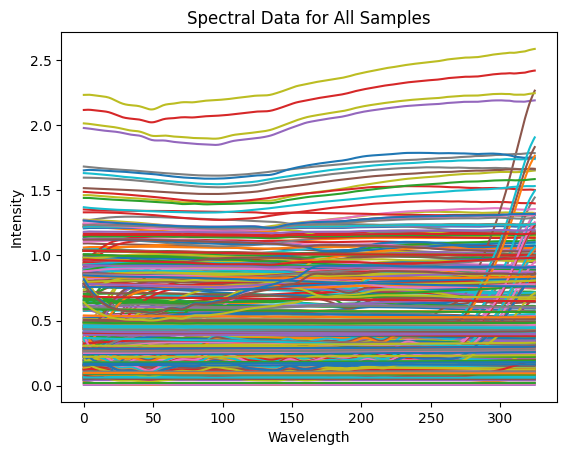

In [8]:
plot_signal(train_data.iloc[:, 5:331])

## Baseline Correction

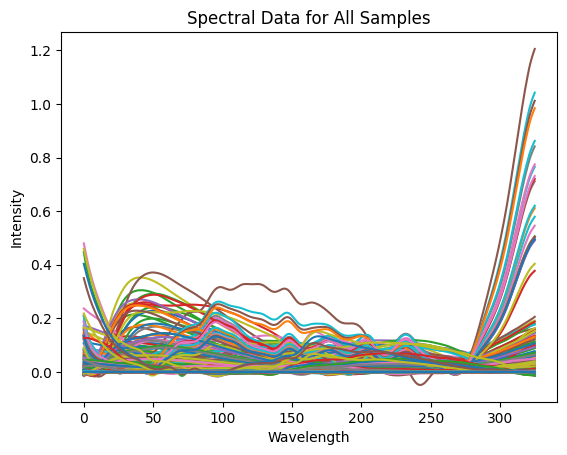

In [9]:
train_data.iloc[:, 5:331] = pd.DataFrame(np.array([row - baseline(row, deg=2) for i, row in train_data.iloc[:, 5:331].iterrows()]))
test_data.iloc[:, 5:331] = pd.DataFrame(np.array([row - baseline(row, deg=2) for i, row in test_data.iloc[:, 5:331].iterrows()]))
plot_signal(train_data.iloc [:, 5:331])

## Normalizing data

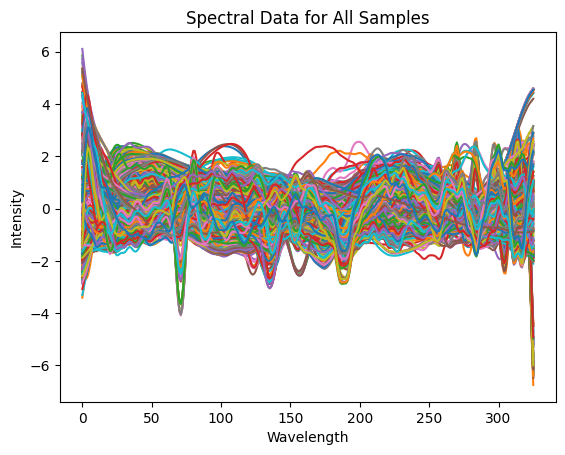

In [10]:
"https://stackoverflow.com/questions/49960288/how-to-standardize-rows-in-pandas"

train_data.iloc[:, 5:331] = train_data.iloc[:, 5:331].sub(train_data.iloc[:, 5:331].mean(1), axis=0).div(train_data.iloc[:, 5:331].std(1), axis=0)
test_data.iloc[:, 5:331] = test_data.iloc[:, 5:331].sub(test_data.iloc[:, 5:331].mean(1), axis=0).div(test_data.iloc[:, 5:331].std(1), axis=0)
plot_signal(train_data.iloc[:, 5:331])

## Savitzky Golay Filter

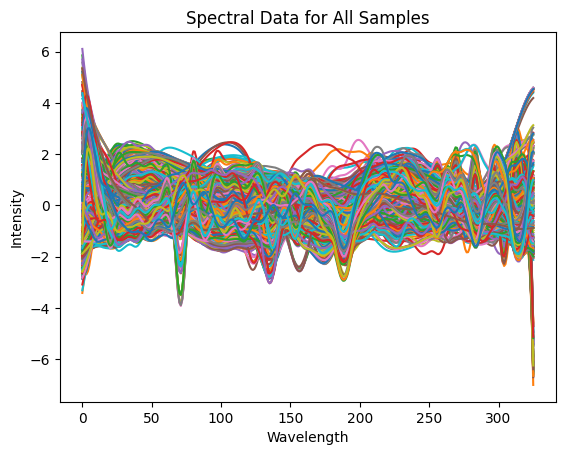

In [11]:
train_data.iloc[:, 5:331] = pd.DataFrame(savgol_filter(train_data.iloc[:, 5:331] , window_length=11, polyorder=3))
test_data.iloc[:, 5:331] = pd.DataFrame(savgol_filter(test_data.iloc[:, 5:331] , window_length=11, polyorder=3))
plot_signal(train_data.iloc[:, 5:331])

## Choosing Features

(7, 251)


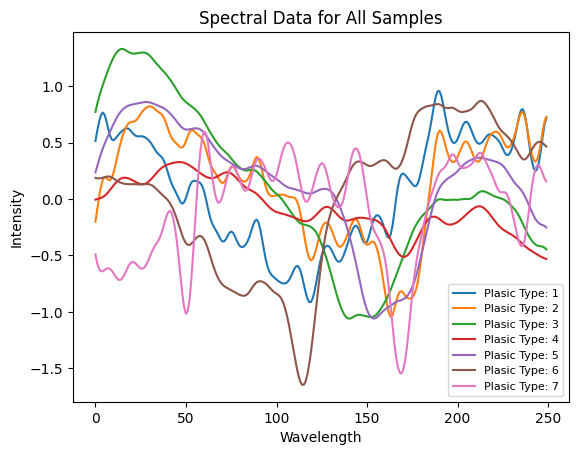

In [12]:
df_new = pd.DataFrame()
for i in range(8):
    if i == 0:
        continue
    else:
        df_new = pd.concat([df_new,
                            train_data[train_data['class'] == i].iloc[:, 5:331].mean(axis=0).to_frame().T])


df_class = pd.DataFrame({'class':[1,2,3,4,5,6,7]})
df_new = df_new.reset_index(inplace=False)
df_new = df_new.drop(columns=['index'])
df_new = df_new.iloc[:, 20:270]
df_new = pd.merge(df_class, df_new, left_index=True, right_index=True)
print(df_new.shape)
plot_signal(df_new.iloc[:, 1:], df_new['class'], labels='yes')

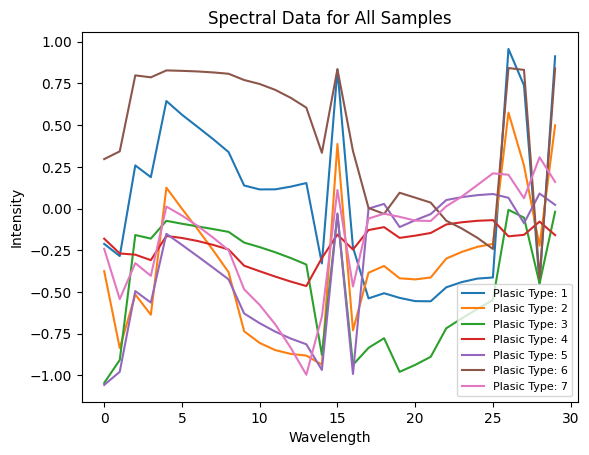

In [13]:
import pymrmr

features = pymrmr.mRMR(df_new.iloc[:, 1:], 'MID', 30)
plot_signal(df_new[features], df_new['class'], labels='yes')

In [14]:
# prompt: from the previous cell, the "features" variable, print its shape/size or whatever size dimensions it has. also if applicable, total number of elements in it. Features is a list apparently

print(len(features)) # Number of features
print(features) #The features themselves


30
['spectrum_173 + 740', 'spectrum_180 + 740', 'spectrum_200 + 740', 'spectrum_199 + 740', 'spectrum_205 + 740', 'spectrum_204 + 740', 'spectrum_203 + 740', 'spectrum_202 + 740', 'spectrum_201 + 740', 'spectrum_198 + 740', 'spectrum_197 + 740', 'spectrum_196 + 740', 'spectrum_195 + 740', 'spectrum_194 + 740', 'spectrum_181 + 740', 'spectrum_207 + 740', 'spectrum_179 + 740', 'spectrum_153 + 740', 'spectrum_152 + 740', 'spectrum_156 + 740', 'spectrum_155 + 740', 'spectrum_154 + 740', 'spectrum_151 + 740', 'spectrum_150 + 740', 'spectrum_149 + 740', 'spectrum_148 + 740', 'spectrum_209 + 740', 'spectrum_206 + 740', 'spectrum_146 + 740', 'spectrum_208 + 740']


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'features' is already defined from earlier cells

# 80 20 train test split
X = train_data[features]
y = train_data['class'] - 1  # make sure clss label starts from 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# init. models
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
svm_model = SVC(probability=True, random_state=42)  # Enable probability estimates for SVM
knn_model = KNeighborsClassifier()

# train em models
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
logreg_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# predictions as probabilities
rf_probs = rf_model.predict_proba(X_test)
dt_probs = dt_model.predict_proba(X_test)
xgb_probs = xgb_model.predict_proba(X_test)
logreg_probs = logreg_model.predict_proba(X_test)
svm_probs = svm_model.predict_proba(X_test)
knn_probs = knn_model.predict_proba(X_test)

# multiply all output probabilities from all models (Bayesian consensus)
combined_probs = rf_probs * dt_probs * xgb_probs * logreg_probs * svm_probs * knn_probs

# normalize probabilities such that they sum to 1 for all samples
normalized_probs = combined_probs / combined_probs.sum(axis=1, keepdims=True)

# Get the final predicted class by taking the class with the highest probability
# get final predicted class by taking class with highest probablity
final_predictions = normalized_probs.argmax(axis=1)

# individual model predictions first
rf_preds = rf_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
logreg_preds = logreg_model.predict(X_test)
svm_preds = svm_model.predict(X_test)
knn_preds = knn_model.predict(X_test)

# eval. indidual models
models = {
    'Random Forest': rf_preds,
    'Decision Tree': dt_preds,
    'XGBoost': xgb_preds,
    'Logistic Regression': logreg_preds,
    'SVM': svm_preds,
    'KNN': knn_preds,
    'Bayesian Ensemble': final_predictions
}

# print em test stats for all models
for model_name, predictions in models.items():
    print(f"Performance of {model_name}:")
    accuracy = accuracy_score(y_test, predictions)
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Classification Report:\n{classification_report(y_test, predictions)}")
    print(f"  Confusion Matrix:\n{confusion_matrix(y_test, predictions)}\n")

# eval final bayes consensus preds
ensemble_accuracy = accuracy_score(y_test, final_predictions)
print(f"Accuracy of Bayesian Ensemble: {ensemble_accuracy:.4f}")


<ipython-input-16-92a78fcca146>:46: RuntimeWarning: invalid value encountered in divide
  normalized_probs = combined_probs / combined_probs.sum(axis=1, keepdims=True)


Performance of Random Forest:
  Accuracy: 0.8315
  Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.92      0.85      0.88        13
           2       0.88      0.70      0.78        10
           3       0.93      0.93      0.93        14
           4       0.71      0.86      0.77        14
           5       0.88      0.64      0.74        11
           6       0.88      1.00      0.93        14

    accuracy                           0.83        89
   macro avg       0.84      0.82      0.82        89
weighted avg       0.84      0.83      0.83        89

  Confusion Matrix:
[[10  1  0  0  1  0  1]
 [ 1 11  1  0  0  0  0]
 [ 0  0  7  0  2  1  0]
 [ 1  0  0 13  0  0  0]
 [ 0  0  0  1 12  0  1]
 [ 2  0  0  0  2  7  0]
 [ 0  0  0  0  0  0 14]]

Performance of Decision Tree:
  Accuracy: 0.6404
  Classification Report:
              precision    recall  f1-score   support

          

Sum log probabilities instead of multiplication from here on, perhaps better?

In [17]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'features' is already defined from earlier cells

# 80 20 train test split
X = train_data[features]
y = train_data['class'] - 1  # make sure clss label starts from 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# init. models
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
svm_model = SVC(probability=True, random_state=42)  # Enable probability estimates for SVM
knn_model = KNeighborsClassifier()

# train em models
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
logreg_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# predictions as probabilities
rf_probs = rf_model.predict_proba(X_test)
dt_probs = dt_model.predict_proba(X_test)
xgb_probs = xgb_model.predict_proba(X_test)
logreg_probs = logreg_model.predict_proba(X_test)
svm_probs = svm_model.predict_proba(X_test)
knn_probs = knn_model.predict_proba(X_test)

# convert probabilities to log probabilities (avoid log(0) by clipping values)
rf_log_probs = np.log(np.clip(rf_probs, 1e-10, 1))
dt_log_probs = np.log(np.clip(dt_probs, 1e-10, 1))
xgb_log_probs = np.log(np.clip(xgb_probs, 1e-10, 1))
logreg_log_probs = np.log(np.clip(logreg_probs, 1e-10, 1))
svm_log_probs = np.log(np.clip(svm_probs, 1e-10, 1))
knn_log_probs = np.log(np.clip(knn_probs, 1e-10, 1))

# sum em log probs (same as multiplying raw probabilities)
combined_log_probs = (
    rf_log_probs +
    dt_log_probs +
    xgb_log_probs +
    logreg_log_probs +
    svm_log_probs +
    knn_log_probs
)

# convert em log probs back to normal
combined_probs = np.exp(combined_log_probs)

# normalize probabilities such that they sum to 1 for all samples
normalized_probs = combined_probs / combined_probs.sum(axis=1, keepdims=True)

# get final predicted class by taking class with highest probablity
final_predictions = normalized_probs.argmax(axis=1)

# individual model predictions first
rf_preds = rf_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
logreg_preds = logreg_model.predict(X_test)
svm_preds = svm_model.predict(X_test)
knn_preds = knn_model.predict(X_test)

# eval. indidual models
models = {
    'Random Forest': rf_preds,
    'Decision Tree': dt_preds,
    'XGBoost': xgb_preds,
    'Logistic Regression': logreg_preds,
    'SVM': svm_preds,
    'KNN': knn_preds,
    'Bayesian Ensemble': final_predictions
}

# print em test stats for all models
for model_name, predictions in models.items():
    print(f"Performance of {model_name}:")
    accuracy = accuracy_score(y_test, predictions)
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Classification Report:\n{classification_report(y_test, predictions)}")
    print(f"  Confusion Matrix:\n{confusion_matrix(y_test, predictions)}\n")

# eval final bayes consensus preds
ensemble_accuracy = accuracy_score(y_test, final_predictions)
print(f"Accuracy of Bayesian Ensemble: {ensemble_accuracy:.4f}")


Performance of Random Forest:
  Accuracy: 0.8315
  Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.92      0.85      0.88        13
           2       0.88      0.70      0.78        10
           3       0.93      0.93      0.93        14
           4       0.71      0.86      0.77        14
           5       0.88      0.64      0.74        11
           6       0.88      1.00      0.93        14

    accuracy                           0.83        89
   macro avg       0.84      0.82      0.82        89
weighted avg       0.84      0.83      0.83        89

  Confusion Matrix:
[[10  1  0  0  1  0  1]
 [ 1 11  1  0  0  0  0]
 [ 0  0  7  0  2  1  0]
 [ 1  0  0 13  0  0  0]
 [ 0  0  0  1 12  0  1]
 [ 2  0  0  0  2  7  0]
 [ 0  0  0  0  0  0 14]]

Performance of Decision Tree:
  Accuracy: 0.6404
  Classification Report:
              precision    recall  f1-score   support

          

In [20]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'features' is already defined from earlier cells

# 80 20 train test split
X = train_data[features]
y = train_data['class'] - 1  # Ensure class labels start from 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# init. models
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
svm_model = SVC(probability=True, random_state=42)  # Enable probability estimates for SVM
knn_model = KNeighborsClassifier()

# # train em models
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
logreg_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# predictions as probabilities
rf_probs = rf_model.predict_proba(X_test)
dt_probs = dt_model.predict_proba(X_test)
xgb_probs = xgb_model.predict_proba(X_test)
logreg_probs = logreg_model.predict_proba(X_test)
svm_probs = svm_model.predict_proba(X_test)
knn_probs = knn_model.predict_proba(X_test)

# init. the prior probabilities from the first model (random forest)
prior_probs = rf_probs

# sequential bayesian consnsus
for model_probs in [dt_probs, xgb_probs, logreg_probs, svm_probs, knn_probs]:
    # step 1: calc. likelihood p(e|h_g) for current model (model_probs)
    likelihood = model_probs  # in this case, model_probs itself serves as likelihoods

    # step 2: calclate posterior p(h_g|e) using bayes formula
    # bayes formula: p(h_g|e) = (p(e|h_g) * p(h_g)) / sum_g (p(e|h_g) * p(h_g))
    posterior_probs = (likelihood * prior_probs) / np.sum(likelihood * prior_probs, axis=1, keepdims=True)

    # step 3: update prior with new posterior probabilities
    prior_probs = posterior_probs  # posterior as new prior for next model

# get final predicted class by taking class with highest probablity
final_predictions = np.argmax(prior_probs, axis=1)


# eval. indidual models predictions first
rf_preds = rf_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
logreg_preds = logreg_model.predict(X_test)
svm_preds = svm_model.predict(X_test)
knn_preds = knn_model.predict(X_test)

models = {
    'Random Forest': rf_preds,
    'Decision Tree': dt_preds,
    'XGBoost': xgb_preds,
    'Logistic Regression': logreg_preds,
    'SVM': svm_preds,
    'KNN': knn_preds,
    'Bayesian Ensemble': final_predictions
}

# print em test stats for all models
for model_name, predictions in models.items():
    print(f"Performance of {model_name}:")
    accuracy = accuracy_score(y_test, predictions)
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Classification Report:\n{classification_report(y_test, predictions)}")
    print(f"  Confusion Matrix:\n{confusion_matrix(y_test, predictions)}\n")

# eval final bayes consensus preds
ensemble_accuracy = accuracy_score(y_test, final_predictions)
print(f"Accuracy of Bayesian Ensemble: {ensemble_accuracy:.4f}")


Performance of Random Forest:
  Accuracy: 0.8315
  Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.92      0.85      0.88        13
           2       0.88      0.70      0.78        10
           3       0.93      0.93      0.93        14
           4       0.71      0.86      0.77        14
           5       0.88      0.64      0.74        11
           6       0.88      1.00      0.93        14

    accuracy                           0.83        89
   macro avg       0.84      0.82      0.82        89
weighted avg       0.84      0.83      0.83        89

  Confusion Matrix:
[[10  1  0  0  1  0  1]
 [ 1 11  1  0  0  0  0]
 [ 0  0  7  0  2  1  0]
 [ 1  0  0 13  0  0  0]
 [ 0  0  0  1 12  0  1]
 [ 2  0  0  0  2  7  0]
 [ 0  0  0  0  0  0 14]]

Performance of Decision Tree:
  Accuracy: 0.6404
  Classification Report:
              precision    recall  f1-score   support

          

<ipython-input-20-4e04ea6cf315>:53: RuntimeWarning: invalid value encountered in divide
  posterior_probs = (likelihood * prior_probs) / np.sum(likelihood * prior_probs, axis=1, keepdims=True)
